# Sampling and the Central Limit Theorem

![sample](https://media.giphy.com/media/OsOP6zRwxrnji/giphy.gif)

# Agenda 

1. Differentiate terms: discriptive/inferential, statistics population/sample, paramater/statistic, sample distribution/sampling distribution
2. Define and calculate standard error
3. Use Numpy to randomly sample a distribution
4. Describe the central limit theorem and connect it to our knowledge of distributions and sampling.
5. Capital Bikeshare Example

## Probability vs Statistics
- Probability starts with known probabilities and obtains how probable any particular observation would be
- Statistics works the other way around. Start with and observations (data) and try to determine its probability

## Descriptive vs Inferential Statistics
- Descriptive Statistics
   > simply describe what is observed. The average height of a high school football team can be directly calculated by measuring all of the current players height.
- Inferential statistics 
    > try to say something general about a larger group of subjects than those we have measured. For example, we would be doing inferential statistics if we wanted to know about the average height of all high school football teams.
    - To put it another way, statistical inference is the process by which we take observations of a subset of a group and generalize to the whole group.

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine what proportion of the population of Seattle owns a car.

![traffic](https://media.giphy.com/media/3orieWY8RCodjD4qqs/giphy.gif)

In order for us to make any determinations about a population, we must first get information about it.

Because it's usually completely impractical to get data about *everyone* in a population, we must take a sample.

## Key Terms
 - the entire group is known as the **population**  
 - the subset is a known as the **sample**


![pop](./img/sample_pop.png)

- We would use samples if the population is:
    - Too big to enumerate
    - too difficult/time consuming or expensive to sample in its entirety.

**Random sampling is not easy to do**  
Continuing our Seattle car example, how would we take a sample? 

Here are two strategies we might employ:

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car

Which strikes you as better?

What do we want our sample to look like?

In particular, what relationship do we want between the sample and the population? What steps can we take to improve our odds of success in achieving this?

# Discussion

![talk amongst yourselves](https://media.giphy.com/media/l2SpQRuCQzY1RXHqM/giphy.gif)

The first way of sampling is considered a convenience sample.
You are going about collection in a non-random manner

# Sample Conditions

1. The sampled observations must be independent
    - The sampling method must be random  


2. Sample size distribution:
    - The more skewed the sample the larger samples we need. 
    - n > 30 is considered a large enough sample unless there is extreme skew

## Population v Sample Terminology
Characteristics of populations are called **parameters**

Characteristics of a sample are called **statistics**

A sample statistic is a **point estimate** of the population parameter

![imgsample](./img/sample_stats.png)

# A Simulation to Reinforce Our Definitions

Let's create a population of systolic blood pressure of adult males in Chicago, assuming a mean of 114 mmHg with a standard deviation of 11 mmHg.  We will also assume the adult male population to be 1.5 million. 

It is impossible to measure the systolic blood pressure of every man in Chicago, but let's assume multiple investigations have led to the conclusion the the mean and std of this population is 114 and 11, respecively. These are therefore estimators of the population parameter.

$\Large\hat\mu = 114$  
$\Large\hat\sigma = 11$



Text(0.5, 0, 'Systolic BP')

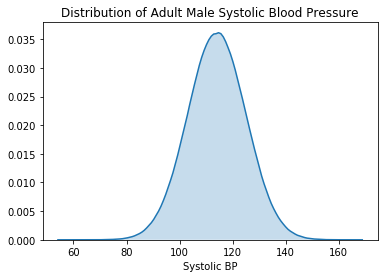

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pop = int(1.5*10**6)
# Use numpy to generate a normal distribution of the 
sys_pop = np.random.normal(loc=114, scale=11, size=pop)

fig, ax = plt.subplots()

sns.kdeplot(sys_pop, ax=ax, shade=True)
ax.set_title('Distribution of Adult Male Systolic Blood Pressure')
ax.set_xlabel('Systolic BP')

Let's then imagine we develop an effective manner of random sampling, and simulate with numpy. Our sample size is 40 people.


In [5]:
sample_size = 40
sample = np.random.choice(sys_pop, sample_size)

# We can look at the distribution of the values in the sample.

Text(0.5, 1.0, 'Sample Distribution of Systolic BP Measurements')

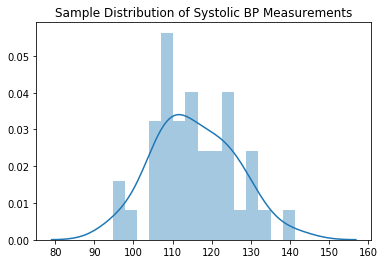

In [6]:
fig, ax = plt.subplots()
sns.distplot(sample, ax=ax, bins=15)
ax.set_title('Sample Distribution of Systolic BP Measurements')

We can then calculate the sample statistics:

In [7]:
print(f'Sample mean: {sample.mean()}')
print(f'Sample standard deviation: {sample.std()}')
print(f'Sample median: {np.median(sample)}')

Sample mean: 115.62127581857094
Sample standard deviation: 10.132764016818737
Sample median: 114.62224354580528


If we repeated this process, taking samples of the population repeatedly, we would get an array of sample statistics.

In [8]:
number_of_samples = 1000
sample_size = 40
sample_stats = []

for _ in range(number_of_samples):
    sample = np.random.choice(sys_pop, sample_size)
    # collect the mean of each of the 1000 samples in sample stats
    sample_stats.append(sample.mean())


The collection of sample stats represents our __sampling distribution__

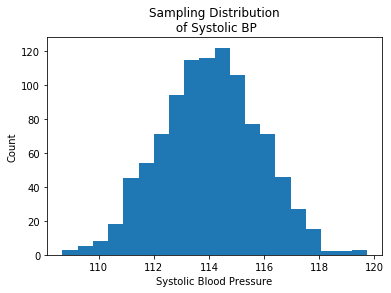

In [9]:
fig, ax = plt.subplots()
ax.hist(sorted(sample_stats), bins=20)
ax.set_title('Sampling Distribution\n of Systolic BP')
ax.set_xlabel("Systolic Blood Pressure")
ax.set_ylabel('Count');

An interesting property of this sampling distribution:
    
As we continue to sample, the mean of the sampling distribution gets closer and closer to the population mean.

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for that fact in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma** <br/>

$\large\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate it by using the sample standard deviation.

$\large\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)  
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


In [10]:
def standard_error(distribution, largest_sample_size, population_std=None):
    
    '''
    Calculate the standard errors for a range of sample sizes
    to demonstrate how standard error decreases when sample 
    size increases.
    '''
 
    std_errors = {}
    
    for sample_size in range(40,largest_sample_size+1):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        # Standard error with sample distribution standard deviation 
        # in place of population
        if population_std == None:
            std_err = np.std(sample)/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
        else:
            std_err = population_std/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
    return std_errors
    

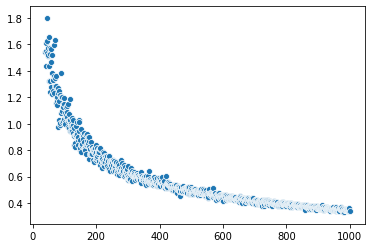

In [11]:
std_errors = standard_error(sys_pop, 1000)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))

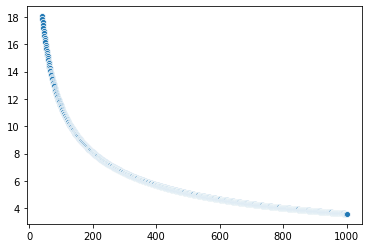

In [12]:
std_errors = standard_error(sys_pop, 1000, population_std=114)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))

# Word Exercise 
Put the variables in the correct place.


In [13]:

var_1 = 'population' 
var_2 = 'sample'
var_3 = 'point estimate' 
var_4 = 'statistic' 
var_5 = 'parameter' 
var_6 = 'sampling' 


print(f"""We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a {var_3} of the population paramter\n""")

print(f"""We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the {var_6} distribution.
        """)

print(f"""There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population {var_5}. 
        """)

print(f"""If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our {var_2} of hibiscus flowers. 
        """)

print(f"""Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the {var_1} of actively 
        operating, registered pizza restaurants in Chicago.
    """)

print(f"""The mean number of hourly hits to Jelle's Marble Racing website 
            randomly sampled across a seven day period represents a sample
            {var_4}.
        """)

We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a point estimate of the population paramter

We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the sampling distribution.
        
There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population parameter. 
        
If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our sample of hibiscus flowers. 
        
Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the population of act


# 2. Use numpy to randomly sample a distribution


## Group Exercise

Below, we have four different sample scenarios.  Each group will code out the following: 

You are given a "population" to sample from based on the type of distribution.

1. Take a random sample of size n, where n > 30, from the population and calculate the mean of that population.

2. Repeat the sample n numbers of times (n = 1000). 

3. Plot the sampling distribution

In [27]:
mccalister = ['Adam', 'Amanda','Chum', 'Dann', 
 'Jacob', 'Jason', 'Johnhoy', 'Karim', 
'Leana','Luluva', 'Matt', 'Maximilian' ]

for n in range(1,4):
    group = np.random.choice(mccalister, 4, replace=False)
    print(f'group {n}', group)
    for name in list(group):
        mccalister.remove(name)


group 1 ['Adam' 'Jason' 'Matt' 'Dann']
group 2 ['Maximilian' 'Johnhoy' 'Chum' 'Jacob']
group 3 ['Leana' 'Luluva' 'Amanda' 'Karim']


## Group 1:

A bowler on the PBA rolls a strike 60% of the time. The population strikes of all games ever bowled is stored in in the population variable below.


Text(0.5, 1.0, 'Strikes Per Game')

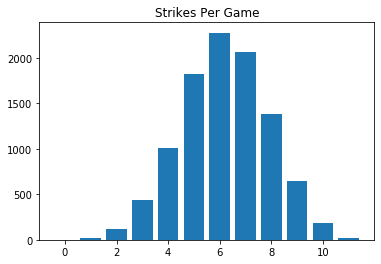

In [66]:
population = np.random.binomial(12, .6, 10000)
fig, ax = plt.subplots()
ax.bar(range(0,12), np.unique(population, return_counts=True)[1])
ax.set_title('Strikes Per Game')

## Group 2:

Stored in the variable below is the number of pieces of mail that arrive per week at your door for each of the 4500 weeks in your life.  

Text(0.5, 0, 'Pieces of Mail')

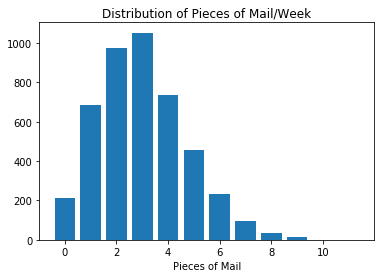

In [68]:
mail_population = np.random.poisson(3, 4500)
counts = np.unique(mail_population, return_counts=True)

fig, ax = plt.subplots()
ax.bar(np.unique(counts[0]), counts[1])
ax.set_title('Distribution of Pieces of Mail/Week')
ax.set_xlabel("Pieces of Mail")

# Group 3 

The population data for the number of minutes between customers arriving in a Piggly Wiggly is stored in the variable piggly_population.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


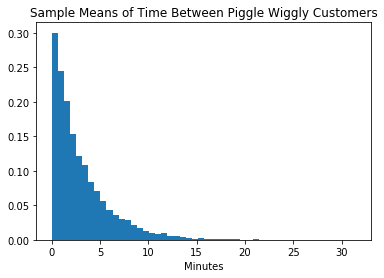

In [14]:
# on average, 20 customers enter per hour
piggly_population = np.random.exponential(1/(20/60), size=10000)
fig, ax = plt.subplots()
ax.hist(piggly_population, bins = 50, normed=True)
ax.set_title('Sample Means of Time Between Piggle Wiggly Customers')
ax.set_xlabel('Minutes');

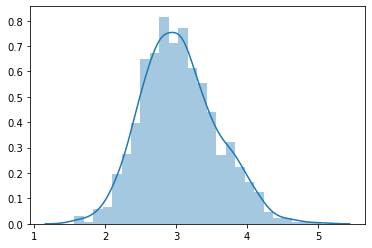

In [35]:
n = 35
sample_list = []
for i in range(0, 1000):
    sample = np.random.choice(piggly_population, n)
    sample_list.append(np.mean(sample))
    
sns.distplot(sample_list)


# 3. Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution, no matter the underlying distribution!

## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./img/probability-basics.gif)

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

As we will see in hypothesis testing, pairing this theorem with the Empirical rule will be very powerful.

![empirical](img/empirical_rule.png)



Knowing that any sampling distribtion, no matter the underlying population distribution, will approach normality, we will be able to judge, given the empirical rule, how rare a given sample statistic is.  

## Bike Example
Capital bike share is trying to figure out their pricing for members versus non-members. The first step in their analysis is to see if members vs non-members ride for different amounts of time per ride.

Let's head over [here](https://s3.amazonaws.com/capitalbikeshare-data/index.html) for some DC bike data!

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline


In [42]:
! wget 'https://s3.amazonaws.com/capitalbikeshare-data/201905-capitalbikeshare-tripdata.zip' -O temp.zip
! unzip temp.zip

--2020-06-03 14:11:33--  https://s3.amazonaws.com/capitalbikeshare-data/201905-capitalbikeshare-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.221
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7837266 (7.5M) [application/zip]
Saving to: ‘temp.zip’

temp.zip            100%[===================>]   7.47M  2.26MB/s    in 3.7s    

2020-06-03 14:11:38 (2.01 MB/s) - ‘temp.zip’ saved [7837266/7837266]

Archive:  temp.zip
  inflating: 201905-capitalbikeshare-tripdata.csv  


In [43]:
df = pd.read_csv('201905-capitalbikeshare-tripdata.csv')

In [44]:
df.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
337699,434,2019-05-31 23:59:15,2019-06-01 00:06:30,31281,8th & O St NW,31627,3rd & M St NE,W23767,Member
337700,227,2019-05-31 23:59:45,2019-06-01 00:03:32,31201,15th & P St NW,31229,New Hampshire Ave & T St NW,W23691,Member
337701,1638,2019-05-31 23:59:45,2019-06-01 00:27:03,31261,21st St & Constitution Ave NW,31247,Jefferson Dr & 14th St SW,W20810,Member
337702,1621,2019-05-31 23:59:51,2019-06-01 00:26:53,31261,21st St & Constitution Ave NW,31247,Jefferson Dr & 14th St SW,W21714,Casual
337703,373,2019-05-31 23:59:51,2019-06-01 00:06:04,31281,8th & O St NW,31201,15th & P St NW,W21769,Member


### Let's take a look at the shape of our dataset

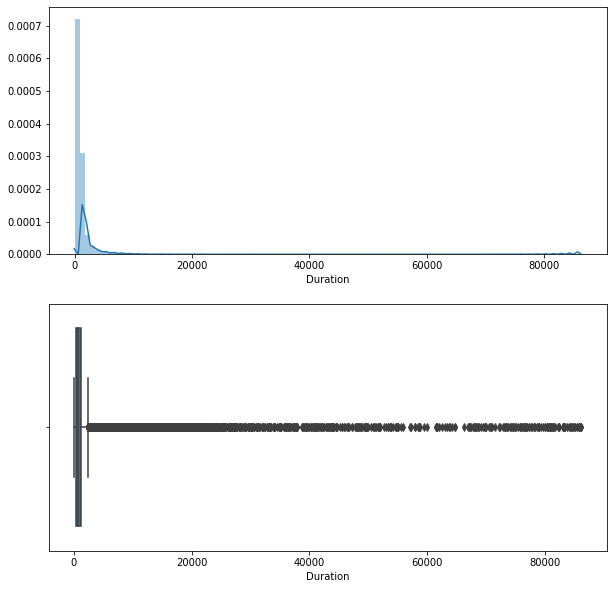

In [45]:
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.distplot(df.Duration, bins = 100, ax=ax[0])
sns.boxplot(df.Duration, ax=ax[1])


The shape is difficult to see because of the outliers. Let's remove some to get a better sense of the shape

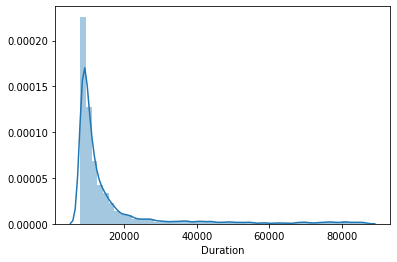

In [46]:
pop_no_fliers = df[np.abs(stats.zscore(df.Duration) > 3)]

fig, ax = plt.subplots()
sns.distplot(pop_no_fliers.Duration)

In [47]:
member_df = df[df['Member type'] == 'Member']
casual_df = df[df['Member type'] == 'Casual']

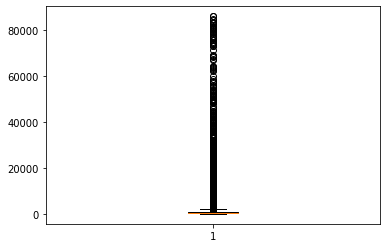

In [48]:
plt.boxplot(member_df['Duration']);


In [49]:
from scipy import stats
print(member_df.shape)
sum(stats.zscore(member_df.Duration)>3)

(286079, 9)


1899

In [50]:
member_df_nofliers = member_df[np.abs(stats.zscore(member_df.Duration)) < 3]
member_df_nofliers.shape

(284180, 9)

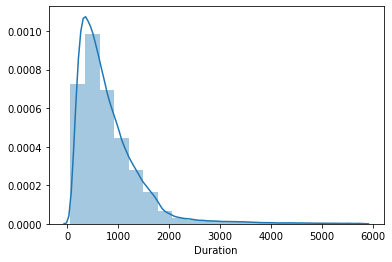

In [51]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(member_df_nofliers.Duration, bins = 20, ax=ax);

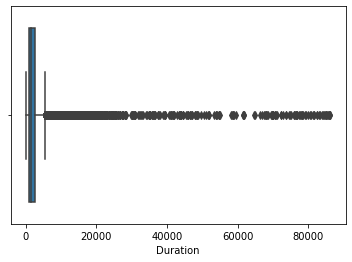

In [52]:
fig, ax = plt.subplots()
sns.boxplot(casual_df.Duration)

In [53]:
casual_df_nofliers = casual_df[np.abs(stats.zscore(casual_df.Duration)) < 3]

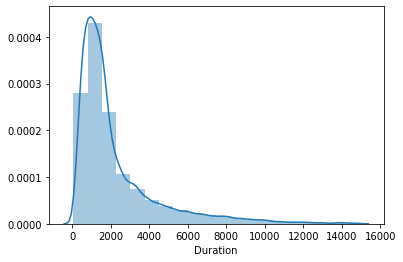

In [54]:
fig, ax = plt.subplots()
sns.distplot(casual_df_nofliers.Duration, bins=20, ax=ax)

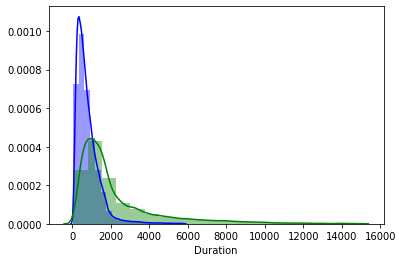

In [55]:
fig, ax = plt.subplots()
sns.distplot(member_df_nofliers.Duration, bins = 20, ax=ax, color='blue');
sns.distplot(casual_df_nofliers.Duration, bins=20, ax=ax, color='green')

#### Get population statistics

In [56]:
df.median()

Duration                  724.0
Start station number    31266.0
End station number      31264.0
dtype: float64

Let's treat the whole dataset as our population.

In [57]:
pop_mean = df.Duration.mean()
pop_std = df.Duration.std()
print(f'pop_mean is {pop_mean} \npop_std is {pop_std}')

pop_mean is 1138.3041865065263 
pop_std is 2282.5139701034495


In [58]:
def one_sample_mean(population):
    sample = np.random.choice(population, size=200, replace=True)
    return sample.mean()

In [59]:
one_sample_mean(df.Duration)

1356.81

### When we take multiple samples from the distribution,and plot the means of each sample, the shape of the curve shifts

(array([ 3.,  4., 10., 11., 20., 26., 29., 44., 59., 53., 73., 74., 54.,
        71., 68., 43., 37., 42., 32., 26., 25., 26., 18., 16., 19.,  9.,
        12., 14., 12.,  8.,  9.,  7., 10.,  5.,  6.,  9.,  2.,  0.,  1.,
         1.,  4.,  1.,  1.,  1.,  0.,  0.,  0.,  3.,  1.,  1.]),
 array([ 842.685 ,  861.6866,  880.6882,  899.6898,  918.6914,  937.693 ,
         956.6946,  975.6962,  994.6978, 1013.6994, 1032.701 , 1051.7026,
        1070.7042, 1089.7058, 1108.7074, 1127.709 , 1146.7106, 1165.7122,
        1184.7138, 1203.7154, 1222.717 , 1241.7186, 1260.7202, 1279.7218,
        1298.7234, 1317.725 , 1336.7266, 1355.7282, 1374.7298, 1393.7314,
        1412.733 , 1431.7346, 1450.7362, 1469.7378, 1488.7394, 1507.741 ,
        1526.7426, 1545.7442, 1564.7458, 1583.7474, 1602.749 , 1621.7506,
        1640.7522, 1659.7538, 1678.7554, 1697.757 , 1716.7586, 1735.7602,
        1754.7618, 1773.7634, 1792.765 ]),
 <a list of 50 Patch objects>)

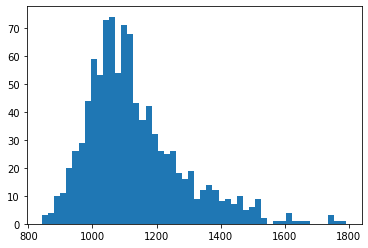

In [60]:
d = [one_sample_mean(df.Duration) for i in range(1000)]
plt.hist(d, bins=50)


In [61]:
import seaborn as sns

def central_limit_theorem_plotter(distribution, sample_size, num_samples, color='blue'):
    sample_means = np.zeros(num_samples)
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means, bins=80, kde=True,  color=color)
    title = f'Sample Distribution n = {sample_size} and number of samples = {num_samples},\
    std error = {pop_std / num_samples}'
    print(f'mean = {sample_means.mean()}')
    plt.title(title)

### The number of samples drives the shape of the curve more than the sample size itself


mean = 1138.17915


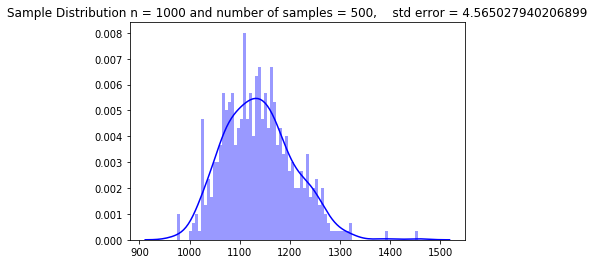

In [62]:
central_limit_theorem_plotter(df.Duration, 1000, 500);

### Larger sample size, Fewer samples

mean = 1135.69218


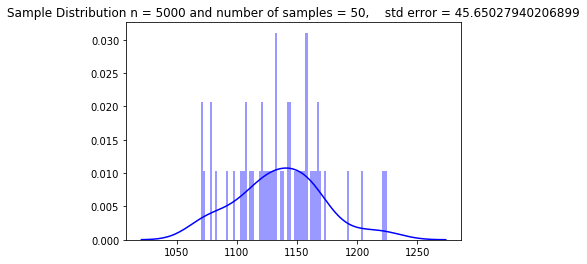

In [63]:
central_limit_theorem_plotter(df.Duration, 5000, 50);

* What happens as we increase the sample size?
* How does the height of the distribution change? Why does it change?

mean = 888.8718400000001
mean = 2531.768392


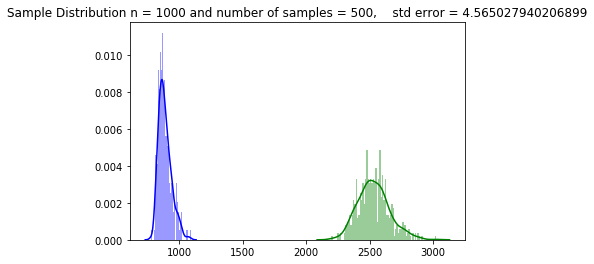

In [64]:
central_limit_theorem_plotter(member_df.Duration, 1000, 500, 'blue')
central_limit_theorem_plotter(casual_df.Duration, 1000, 500, 'green')